# การตรวจสอบ geopotential height
* Geopotential (z แทนตัวแปรใน ERA5 มีหน่วย m**2 s**-2) vs Geopotential Height (Z ตัวใหญ่)
* Geopotential เป็นพลังงานศักย์ที่ต้องการต่อหนึ่งหน่วยมวลที่จะสามารถยกก้อนอากาศขึ้นไปเป็นระยะทางหนึ่งหน่วย ภายใต้แรงโน้มถ่วง
* The Geopotential meter (1  meter of geopotential height) หรือ 1 เมตรของ geopotential height มีความสัมพันธ์กับ Dynamic meter ที่กล่าวได้ว่า one geopotential meter = 0.98 dynamic meter
* Geopotential height หรือ Z (ตัวใหญ่) เป็นความสูงของระดับความกดบรรยากาศระดับใดระหนึ่งที่อยู่สูงจากระดับน้ำทะเลปานกลาง

* สามารถแปลงค่า Geopotential จากข้อมูล ERA5 ให้เป็นค่า Geopotential height ที่มีหน่วยเป็นเมตรได้จาก การเอาค่าแรงโน้ถ่วง 9.80665 m/s**2 ไป หาร Geopotentail ได้  จากความสัมพันธ์ระหว่าง geopotential height (Z) and geometric height (z) ที่ว่า Z = gz/980  Thus, when gravity (g) has its near-average value of 980 cm/sec2, heights in geopotential meters and and geometric meters are the same; for g < 980 cm/sec2, the height in geopotential meters is the smaller, for g > 980 cm/sec2 it is larger.


* คำอธิบาย geopotential height 
    * อธิบาย geopotential โดย Dr.Kevin Perry https://www.youtube.com/watch?v=LWfgqm9gedk และ Dr.Mick Pope https://www.youtube.com/watch?v=yP6dZcA4RPE
    *  https://www.youtube.com/watch?v=8tGVKn93mAA&t=15s
    * https://disc.gsfc.nasa.gov/information/glossary?title=Giovanni%20Measurement%20Definitions:%20Geopotential%20Height
    * การใช้งาน geopotential height ในการตรวจดู trough/ridge ในละติจูดกลางใช้ระดับ 500 hPa https://www.weather.gov/source/zhu/ZHU_Training_Page/Miscellaneous/Heights_Thicknesses/thickness_temperature.htm#:~:text=Geopotential%20height%20approximates%20the%20actual,which%20the%20observation%20was%20taken.

* วิธีการแปลง geopotential เป็น geopotential height จากเอกสารของ ERA5 https://confluence.ecmwf.int/display/CKB/ERA5%3A+compute+pressure+and+geopotential+on+model+levels%2C+geopotential+height+and+geometric+height


* โค้ดดัดแปลงมาจาก https://unidata.github.io/python-gallery/examples/850hPa_TMPC_Winds.html
* โค้ดดัดแปลงจากลิงก์นี้ https://unidata.github.io/python-gallery/examples/500hPa_HGHT_Winds.html

### แนะนำให้นิสิตอ่าน
* ในปี 2554 มีมหาอุทกภัย มีพายุหลายลูกเข้าประเทศไทยมากกว่าปีปรกติ อ่าน http://tiwrmdev.hii.or.th/current/menu.html นิสิตสามารถนำเหตุการณ์นี้มาใช้ในการศึกษาได้ในรายวิชาบรรยากาศวิทยาเบี้องต้น ภูมิอากาศวิทยา รีโมทเซนซิ่งขั้นสูง และวิชาอื่นๆ ที่เกี่ยวข้องในทางภูมิศาสตร์และสิ่งแวดล้อม กรณีศึกษาเหล่านี้จะช่วยให้เกิดความเข้าใจถึงสถานการณ์ที่รุนแรงนี้ อันจะช่วยให้เกิดการเสนอแนวทางป้องกัน แก้ไขและบรรเทาผลกระทบที่จะเกิดจากเหตุการณ์ในอนาคตได้เป็นอย่างดี
* พายุดังกล่าวได้แก่
    * พายุไหหม่า เดือน มิถุนายน 
    * พายุนกเตน: ต่อด้วยพายุนกเตนในเดือนกรกฏาคม 
    * พายุไห่ถาง: จากนั้นก็มีพายุไห่ถางในปลายกรกฎาคมเช่นกัน 
    * พายุเนสาด : ส่วนในปลายเดือนกันยายนพบว่ามีพายุเนสาดเข้ามาทางตอนเหนือของเวียดนาม 
    * พายุนาลแก : ในช่วงต้นเดือนตุลาคม

* นอกจากนั้นยังพบว่ามีร่องมรสุมพาดผ่านประเทศไทยอย่างต่อเนื่อง ตั้งแต่เดือนพฤษภาคมถึงเดือนตุลาคม ทำให้เหนี่ยวนำให้เกิดปริมาณฝนที่มาก

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
import numpy as np
import xarray as xr
%matplotlib inline

## 1.อ่านและเก็บค่าตัวแปรจากข้อมูล ERA5

In [3]:
ds = xr.open_dataset('era5_daily_2_5oct_2011_globe.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 8, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-16 09:15:12 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [3]:
ds.coords

Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05

In [4]:
ds = ds.sel(time='2011-10-02')

In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
    time       datetime64[ns] 2011-10-02
Data variables:
    d          (level, latitude, longitude) float32 ...
    z          (level, latitude, longitude) float32 ...
    r          (level, latitude, longitude) float32 ...
    q          (level, latitude, longitude) float32 ...
    t          (level, latitude, longitude) float32 ...
    u          (level, latitude, longitude) float32 ...
    v          (level, latitude, longitude) float32 ...
    vo         (level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-16 09:15:12 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [6]:
ds.z

<xarray.DataArray 'z' (level: 8, latitude: 721, longitude: 1440)>
[8305920 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
    time       datetime64[ns] 2011-10-02
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

# เก็บค่าตัวแปรที่ต้องใช้

In [7]:
#x = df.longitude
#y = df.latitude
#z= df.z
#u=df.u
#v=df.v
#t=df.t


In [8]:
#z

In [9]:
 ds.time.data

array('2011-10-02T00:00:00.000000000', dtype='datetime64[ns]')

## 2.จัดการข้อมูล

### เลือกข้อมูลและเลือกพื้นที่ศึกษาอินโดจีนและบริเวณโดยรอบ

In [10]:
# เลือกพื้นที่ที่ต้องการจากข้อมูลทั้งหมด เพื่อลดการคำนวณ
lon_slice = slice(75, 125)
lat_slice = slice(35, 0)

# เก็บตัวแปร lat/lon values 
lats = ds.latitude.sel(latitude=lat_slice).values
lons = ds.longitude.sel(longitude=lon_slice).values

# เซตค่าระดับความกดอากาศที่ต้องการวิเคราะห์
level = 850

# เซตค่าตัวแปรที่ต้องการพลอต
hght_850 = ds.z.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
hght_850 = hght_850 / 9.80665  #9.80665 m/s**2  แปลงค่า geopotential ไปเป็น geopotential height ในระดับความสูงเหนือ geoid

tmpk_850 = ds.t.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
uwnd_850 = ds.u.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
vwnd_850 = ds.v.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array

# แปลงค่าอุณหภูมิจากเคลวินเป็นเซลเซียส
tmpc_850 = tmpk_850.to('degC')

# เก็บค่าตัวแปรเวลาของข้อมูล
vtime = ds.time.data.astype('datetime64[ms]').astype('O')

### พลอตแผนที่ 

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


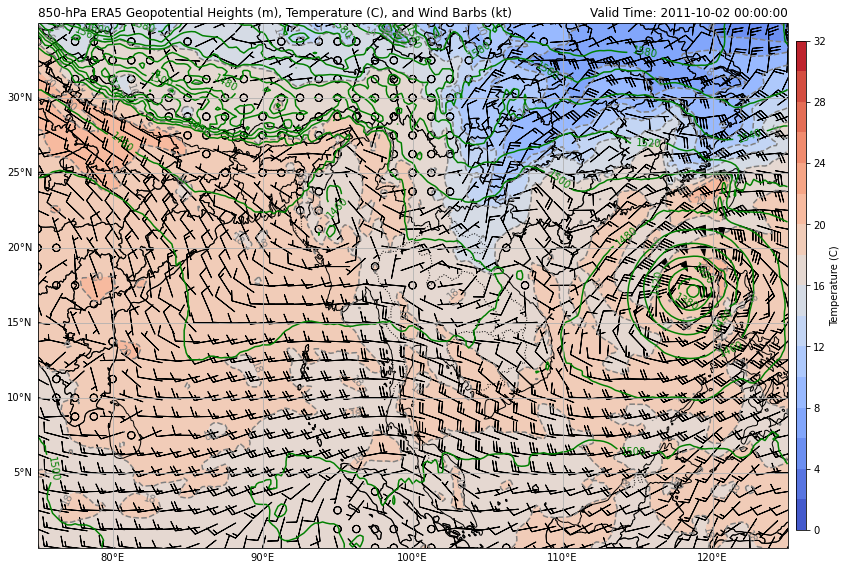

In [11]:
# กำหนดค่าเส้นโครงแผนที่
mapcrs = ccrs.PlateCarree(central_longitude=100)

# กำหนดค่าเส้นโครงแผนที่ของข้อมูล
datacrs = ccrs.PlateCarree()

# ตั้งค่ารูปภาพ figure และสร้าง plot axes ด้วยการกำหนดเส้นโครงแผนที่
fig = plt.figure(1, figsize=(16, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([75, 125, 0, 35], ccrs.PlateCarree())

# เพิ่มขอบเขตการปกครอง
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

# พลอตเส้นเท่า และลงสี 850-hPa temperatures หน่วย Celsius
clevs_850_tmpc = np.arange(0, 34, 2)
cf = ax.contourf(lons, lats, tmpc_850, clevs_850_tmpc, cmap=plt.cm.coolwarm, transform=datacrs)
cb = plt.colorbar(cf, orientation='vertical', pad=0.01, aspect=50, shrink=0.75)
cb.set_label('Temperature (C)')
csf = ax.contour(lons, lats, tmpc_850, clevs_850_tmpc, colors='grey',
                 linestyles='dashed', transform=datacrs)
plt.clabel(csf, fmt='%d')

# พลอตเส้นชั้นเท่าของ 850-hPa geopotential heights ในหน่วย meters
clevs_850_hght = np.arange(0, 8000, 20)
cs = ax.contour(lons, lats, hght_850, clevs_850_hght, colors='green', transform=datacrs)
plt.clabel(cs, fmt='%d')

# พลอต wind barbs ทุกๆ 5 กริด เนื่องจากกริดละเอียดมาก
wind_slice = (slice(None, None, 5), slice(None, None, 5))
ax.barbs(lons[wind_slice[0]], lats[wind_slice[1]],
         uwnd_850[wind_slice[0], wind_slice[1]].to('kt').m,
         vwnd_850[wind_slice[0], wind_slice[1]].to('kt').m,
         pivot='middle', color='black', transform=datacrs)

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# ใส่ชื่อและข้อมูลของภาพ
plt.title('850-hPa ERA5 Geopotential Heights (m), Temperature (C), '
          'and Wind Barbs (kt)', loc='left')
plt.title('Valid Time: {}'.format(vtime), loc='right')

plt.show()

In [12]:
uwnd_850.shape

(141, 201)

### อธิบายแผนที่ระดับความกดอากาศ 850 hPa
* ความกดอากาศสูงอยู่ในละติจูดกลาง ทางตะวันออกของประเทศจีน ประกอบกับมีอุณหภูมิที่ต่ำกว่า 10 องศาเซลเซียส
* ในขณะที่อินโดจีนมีความกดอากาศต่ำ โดยมีอุณหภูมิที่สูงกว่าในระดับ 20 องศาเซลเซียส
* ทะเลจีนใต้ บริเวณทางตะวันออกเฉียงเหนือของฟิลิปปินส์พบว่ามีความกดอากาศต่ำ ที่เกิดจากพายุหมุนเขตร้อนนาลแก พัดมุ่งหน้าเข้ามายังอินโดจีน ทางตะวันออกของประเทศเวียดนาม โดยมีค่า geopotential height ในบริเวณใจกลางของพายุที่ต่ำกว่าบริเวณโดยรอบ 
* บริเวณมหาสมุทรอินเดียและอ่านไทยพบว่ามีลมที่แรงพัดเข้าใจกลางของตัวพายุนาลแกสังเกตุได้จาก wind barb
* ในขณะที่เกิดกระแสลมที่ปั่นป่วนโดยมีการหมุนวนของกระแสลมในบริเวณทางภาคเหนือและภาคตะวันออกเฉียงเหนือของประเทศไทย 

### งานมอบหมายนิสิต
* 1. ให้นิสิตทำการพลอตแผนที่ในระดับความกดอากาศ 925, 500 และ 200 hPa เพื่อเปรียบเทียบกับ 850 hPa ในช่วงพายุนาลแกของวันที่ 2 ตุลาคม แล้วทำการบรรยาย อภิปรายเปรียบเทียบถึงความผันแปรของตัวแปรในแผนที่ในเชิงภูมิศาสตร์ ความแรง ทิศทาง ระดับอุณหภูมิ
* 2. ให้นิสิตทำการพลอตแผนที่ในระดับ 850 hPa ของวันที่ 3-5 ตุลาคม  แล้วทำการบรรยาย อภิปรายเปรียบเทียบถึงความผันแปรของตัวแปรในแผนที่ในเชิงภูมิศาสตร์ ความแรง ทิศทาง ระดับอุณหภูมิ